# IMS_3.07
- **Description** : Comparaison du coefficient de corrélation linéaire et des rapports de corrélation
- **Source** : Introduction à la méthode statistique - Catherine Pardoux  
- **Chapitre** :  3 - Distributions statistiques à deux caractères
- **Exercice** : 3.7

## Enoncé
![Enonce IMS_3.07](../images/Enonces/IMS_3.07_enonce.PNG)

## Chargement des données

In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

DATA = "IMS_3.07_donnees.csv"

In [296]:
donnees = pd.read_csv(DATA, index_col=0)
donnees = donnees.fillna(0)
donnees

,"[5,7[","[7,9[","[9,11[","[11,13[","[13,15[","[15,17[","[17,19]"
X\Y,,,,,,,
"[5,7[",7.0,3.0,2.0,0.0,0.0,0.0,0.0
"[7,9[",2.0,12.0,12.0,2.0,0.0,0.0,0.0
"[9,11[",1.0,10.0,18.0,8.0,2.0,0.0,0.0
"[11,13[",0.0,7.0,15.0,21.0,10.0,1.0,0.0
"[13,15[",0.0,0.0,11.0,12.0,13.0,5.0,0.0
"[15,17[",0.0,0.0,1.0,3.0,10.0,7.0,1.0
"[17,19]",0.0,0.0,0.0,0.0,1.0,1.0,2.0


## Question 1

***Rappel : Définition du rapport de corrélation***   
![Rappel - Définition du rapport de corrélation](../images/Rappels/rappel_definition_rapport_correlation.PNG)   
***Rappel : Interprétation du rapport de corrélation***

### Rapport de corrélation de Y en X

#### Création du tableau

In [297]:
caracteristiques_Y_X = pd.DataFrame(columns = ['X', 'Effectifs', 'Moyennes conditionnelles', 'Carrés intra-classe', 'Carrés inter-classe'])
caracteristiques_Y_X['X'] = donnees.index
caracteristiques_Y_X = caracteristiques_Y_X.set_index('X')
caracteristiques_Y_X 

,Effectifs,Moyennes conditionnelles,Carrés intra-classe,Carrés inter-classe
X,,,,
"[5,7[",NaN,NaN,NaN,NaN
"[7,9[",NaN,NaN,NaN,NaN
"[9,11[",NaN,NaN,NaN,NaN
"[11,13[",NaN,NaN,NaN,NaN
"[13,15[",NaN,NaN,NaN,NaN
"[15,17[",NaN,NaN,NaN,NaN
"[17,19]",NaN,NaN,NaN,NaN


#### Calcul des effectifs

In [298]:
caracteristiques_Y_X['Effectifs'] = donnees.sum(axis=1)
caracteristiques_Y_X 

,Effectifs,Moyennes conditionnelles,Carrés intra-classe,Carrés inter-classe
X,,,,
"[5,7[",12.0,NaN,NaN,NaN
"[7,9[",28.0,NaN,NaN,NaN
"[9,11[",39.0,NaN,NaN,NaN
"[11,13[",54.0,NaN,NaN,NaN
"[13,15[",41.0,NaN,NaN,NaN
"[15,17[",22.0,NaN,NaN,NaN
"[17,19]",4.0,NaN,NaN,NaN


#### Calcul des moyennes conditionnelles

In [299]:
def centres_classes(list_bornes_classes):
    centres_classes = []
    # filtre les nombres d'une liste de bornes de classes
    for s in list_bornes_classes:
        deux_bornes =  re.findall("\d+",s)
        centre_classe = (float(deux_bornes[0]) + float(deux_bornes[1]))/2
        centres_classes.append(centre_classe)
    return centres_classes

In [300]:
## Calcul des moyennes de Y conditionnellement à X grâce à la méthode apply() à laquelle on passe une expression lambda
# L'expression lambda calcule la moyenne des centres des classes pondérée par les effectifs présents dans chaque ligne du tableau de données
caracteristiques_Y_X['Moyennes conditionnelles'] = donnees.apply(lambda row : np.average(centres_classes(donnees.columns), weights=row), axis=1)
caracteristiques_Y_X 

,Effectifs,Moyennes conditionnelles,Carrés intra-classe,Carrés inter-classe
X,,,,
"[5,7[",12.0,7.166667,NaN,NaN
"[7,9[",28.0,9.000000,NaN,NaN
"[9,11[",39.0,10.000000,NaN,NaN
"[11,13[",54.0,11.370370,NaN,NaN
"[13,15[",41.0,12.585366,NaN,NaN
"[15,17[",22.0,14.363636,NaN,NaN
"[17,19]",4.0,16.500000,NaN,NaN


#### Somme des carrés intra-classe

##### Calcul des carrés intra-classe (variances pondérées des valeurs par rapport à la moyenne conditionnelle)

In [301]:
liste_carrés_intra = []
centres = centres_classes(donnees.columns)
moyennes = caracteristiques_Y_X['Moyennes conditionnelles']
effectifs = donnees.values.tolist()
# On calcule pour chaque modalité de X : sum[nombre_effectifs * (valeur (centrée) de Y - moyenne conditionnelle de Y)^2]
for row, moyenne in zip(effectifs, moyennes):
    carré_intra = sum([n*(centre - moyenne)**2 for n, centre in zip(row,centres)])
    liste_carrés_intra.append(carré_intra)   
caracteristiques_Y_X['Carrés intra-classe'] = liste_carrés_intra
caracteristiques_Y_X 

,Effectifs,Moyennes conditionnelles,Carrés intra-classe,Carrés inter-classe
X,,,,
"[5,7[",12.0,7.166667,27.666667,NaN
"[7,9[",28.0,9.000000,60.000000,NaN
"[9,11[",39.0,10.000000,120.000000,NaN
"[11,13[",54.0,11.370370,206.592593,NaN
"[13,15[",41.0,12.585366,161.951220,NaN
"[15,17[",22.0,14.363636,69.090909,NaN
"[17,19]",4.0,16.500000,11.000000,NaN


##### Calcul de la somme des carrés intra-classe

In [302]:
sc_intra = caracteristiques_Y_X['Carrés intra-classe'].sum()
sc_intra

656.3013878623635

#### Somme des carrés inter-classe

##### Calcul de la moyenne marginale de Y

In [303]:
distribution_marginale_Y = pd.DataFrame(donnees.sum(axis=0), donnees.columns, columns=['Total Y'])
distribution_marginale_Y.T

,"[5,7[","[7,9[","[9,11[","[11,13[","[13,15[","[15,17[","[17,19]"
Total Y,10.0,32.0,59.0,46.0,36.0,14.0,3.0


In [304]:
moyenne_marginale_Y = np.average(centres_classes(donnees.columns), weights=distribution_marginale_Y['Total Y'])
print("La moyenne marginale de Y est :", moyenne_marginale_Y)

La moyenne marginale de Y est : 11.2


##### Calcul des carrés inter-classe (variances pondérées des moyennes conditionnelles de chaque groupe par rapport à la moyenne marginale)

In [305]:
## Calcul des moyennes de Y conditionnellement à X grâce à la méthode apply() à laquelle on passe une expression lambda
# L'expression lambda calcule la moyenne des centres des classes pondérée par les effectifs présents dans chaque ligne du tableau de données
caracteristiques_Y_X['Carrés inter-classe'] = caracteristiques_Y_X .apply(lambda row : row['Effectifs'] * (row['Moyennes conditionnelles'] - moyenne_marginale_Y)**2, axis=1)
caracteristiques_Y_X 

,Effectifs,Moyennes conditionnelles,Carrés intra-classe,Carrés inter-classe
X,,,,
"[5,7[",12.0,7.166667,27.666667,195.213333
"[7,9[",28.0,9.000000,60.000000,135.520000
"[9,11[",39.0,10.000000,120.000000,56.160000
"[11,13[",54.0,11.370370,206.592593,1.567407
"[13,15[",41.0,12.585366,161.951220,78.688780
"[15,17[",22.0,14.363636,69.090909,220.189091
"[17,19]",4.0,16.500000,11.000000,112.360000


##### Calcul de la somme des carrés inter-classe

In [306]:
sc_inter= caracteristiques_Y_X['Carrés inter-classe'].sum()
sc_inter

799.6986121376365

#### Calcul du rapport de corrélation de Y en X

In [307]:
sc_total = sc_intra + sc_inter
rapport_corrélation_Y_X = sc_inter / sc_total
rapport_corrélation_Y_X

0.5492435522923328

### Rapport de corrélation de X en Y
On réalise les mêmes opérations pour trouver le rapport de corrélation de X en Y.

In [308]:
caracteristiques_X_Y = pd.DataFrame(columns = ['Y', 'Effectifs', 'Moyennes conditionnelles', 'Carrés intra-classe', 'Carrés inter-classe'])
caracteristiques_X_Y['Y'] = donnees.columns
caracteristiques_X_Y = caracteristiques_X_Y.set_index('Y')
caracteristiques_X_Y 

,Effectifs,Moyennes conditionnelles,Carrés intra-classe,Carrés inter-classe
Y,,,,
"[5,7[",NaN,NaN,NaN,NaN
"[7,9[",NaN,NaN,NaN,NaN
"[9,11[",NaN,NaN,NaN,NaN
"[11,13[",NaN,NaN,NaN,NaN
"[13,15[",NaN,NaN,NaN,NaN
"[15,17[",NaN,NaN,NaN,NaN
"[17,19]",NaN,NaN,NaN,NaN


In [309]:
caracteristiques_X_Y['Effectifs'] = donnees.sum(axis=0)
caracteristiques_X_Y 

,Effectifs,Moyennes conditionnelles,Carrés intra-classe,Carrés inter-classe
Y,,,,
"[5,7[",10.0,NaN,NaN,NaN
"[7,9[",32.0,NaN,NaN,NaN
"[9,11[",59.0,NaN,NaN,NaN
"[11,13[",46.0,NaN,NaN,NaN
"[13,15[",36.0,NaN,NaN,NaN
"[15,17[",14.0,NaN,NaN,NaN
"[17,19]",3.0,NaN,NaN,NaN


In [310]:
caracteristiques_X_Y['Moyennes conditionnelles'] = donnees.apply(lambda row : np.average(centres_classes(donnees.index), weights=row), axis=0)
caracteristiques_X_Y 

,Effectifs,Moyennes conditionnelles,Carrés intra-classe,Carrés inter-classe
Y,,,,
"[5,7[",10.0,6.800000,NaN,NaN
"[7,9[",32.0,9.312500,NaN,NaN
"[9,11[",59.0,10.813559,NaN,NaN
"[11,13[",46.0,12.260870,NaN,NaN
"[13,15[",36.0,13.888889,NaN,NaN
"[15,17[",14.0,15.142857,NaN,NaN
"[17,19]",3.0,17.333333,NaN,NaN


In [311]:
liste_carrés_intra = []
centres = centres_classes(donnees.index)
moyennes = caracteristiques_X_Y['Moyennes conditionnelles']
effectifs = donnees.values.transpose().tolist()
for row, moyenne in zip(effectifs, moyennes):
    carré_intra = sum([n*(centre - moyenne)**2 for n, centre in zip(row,centres)])
    liste_carrés_intra.append(carré_intra)   
caracteristiques_X_Y['Carrés intra-classe'] = liste_carrés_intra
caracteristiques_X_Y 

,Effectifs,Moyennes conditionnelles,Carrés intra-classe,Carrés inter-classe
Y,,,,
"[5,7[",10.0,6.800000,17.600000,NaN
"[7,9[",32.0,9.312500,108.875000,NaN
"[9,11[",59.0,10.813559,312.949153,NaN
"[11,13[",46.0,12.260870,156.869565,NaN
"[13,15[",36.0,13.888889,127.555556,NaN
"[15,17[",14.0,15.142857,29.714286,NaN
"[17,19]",3.0,17.333333,2.666667,NaN


In [312]:
sc_intra = caracteristiques_X_Y['Carrés intra-classe'].sum()
sc_intra

756.230225696272

In [313]:
distribution_marginale_X = pd.DataFrame(donnees.sum(axis=1), donnees.columns, columns=['Total X'])
distribution_marginale_X.T

,"[5,7[","[7,9[","[9,11[","[11,13[","[13,15[","[15,17[","[17,19]"
Total X,12.0,28.0,39.0,54.0,41.0,22.0,4.0


In [314]:
moyenne_marginale_X = np.average(centres_classes(donnees.index), weights=distribution_marginale_X['Total X'])
print("La moyenne marginale de X est :", moyenne_marginale_X)

La moyenne marginale de X est : 11.66


In [315]:
caracteristiques_X_Y['Carrés inter-classe'] = caracteristiques_X_Y .apply(lambda row : row['Effectifs'] * (row['Moyennes conditionnelles'] - moyenne_marginale_X)**2, axis=1)
caracteristiques_X_Y 

,Effectifs,Moyennes conditionnelles,Carrés intra-classe,Carrés inter-classe
Y,,,,
"[5,7[",10.0,6.800000,17.600000,236.196000
"[7,9[",32.0,9.312500,108.875000,176.344200
"[9,11[",59.0,10.813559,312.949153,42.271247
"[11,13[",46.0,12.260870,156.869565,16.608035
"[13,15[",36.0,13.888889,127.555556,178.846044
"[15,17[",14.0,15.142857,29.714286,169.824114
"[17,19]",3.0,17.333333,2.666667,96.560133


In [316]:
sc_inter = caracteristiques_X_Y['Carrés inter-classe'].sum()
sc_inter

916.6497743037278

In [317]:
sc_total = sc_intra + sc_inter
rapport_corrélation_X_Y = sc_inter / sc_total
rapport_corrélation_X_Y

0.5479471177273493

## Question 2

***Rappel : Tracer la courbe de régression de Y en X***   
![Rappel - Corubre de régression](../images/Rappels/rappel_courbe_de_regression.PNG)   


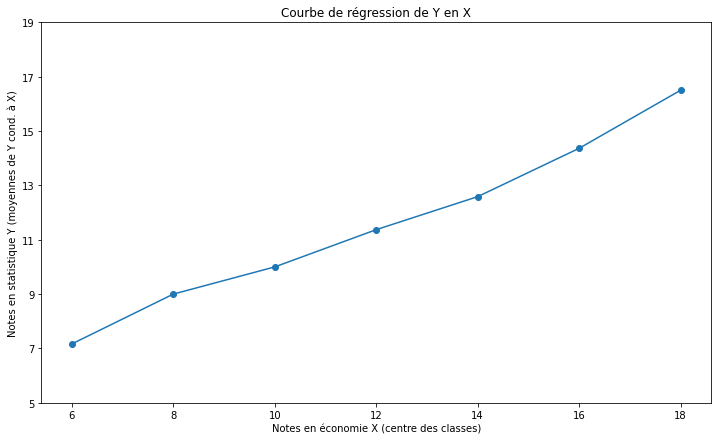

In [318]:
X = centres_classes(donnees.index)
Y = caracteristiques_Y_X['Moyennes conditionnelles']
plt.figure(figsize=(12, 7))
plt.plot(X, Y,'-o')
plt.yticks(range(5,21,2))
plt.title("Courbe de régression de Y en X")
plt.xlabel("Notes en économie X (centre des classes)")
plt.ylabel("Notes en statistique Y (moyennes de Y cond. à X)")
plt.show() 

## Question 3

***Rappel : Comparaison du coefficient de corrélation linéaire et des rapports de corrélation***   
![Rappel - Comparaison du coefficient de corrélation linéaire et des rapports de corrélation](../images/Rappels/rappel_comparaison_coefficient_correlation_lineaire_rapports_correlation.PNG)   


Les variables X et Y étant quantitatives, on peut mesurer leur liaison à l’aide du coefficient de corrélation linéaire.

### Coefficient de corrélation linéaire

***Rappel : Coefficient de corrélation linéaire - Définition***  
![Rappel - Coefficient de corrélation linéaire](../images/Rappels/rappel_coefficient_correlation_lineaire_definition.PNG)

#### Calcul des ecart-type

In [319]:
def ecart_type_pondere(values, weights):
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)
    return  math.sqrt(variance)

##### Ecart-type de X

In [320]:
distribution_marginale_X

,Total X
"[5,7[",12.0
"[7,9[",28.0
"[9,11[",39.0
"[11,13[",54.0
"[13,15[",41.0
"[15,17[",22.0
"[17,19]",4.0


In [321]:
X = centres_classes(distribution_marginale_x.index)
weights_X = distribution_marginale_X['Total X']
ecart_type_X = ecart_type_pondere(X, weights_X)
ecart_type_X

2.8921272447802155

##### Ecart-type de Y

In [322]:
distribution_marginale_Y

,Total Y
"[5,7[",10.0
"[7,9[",32.0
"[9,11[",59.0
"[11,13[",46.0
"[13,15[",36.0
"[15,17[",14.0
"[17,19]",3.0


In [323]:
Y = centres_classes(distribution_marginale_y.index)
weights_Y = distribution_marginale_Y['Total Y']
ecart_type_Y = ecart_type_pondere(Y, weights_Y)
ecart_type_Y

2.698147512646408

#### Calcul de la covariance entre X et Y

***Rappel : Covariance entre deux variables statistiques***   
![Rappel - Covariance entre deux variables statistiques](../images/Rappels/rappel_covariance.PNG)

In [324]:
cov_X_Y = 0
effectifs_totaux = donnees.to_numpy().sum()
for i in range(0, len(donnees.index)):
    for j in range(0, len(donnees.columns)):
        cov_X_Y += (donnees.iloc[i,j] / effectifs_totaux )  * (X[i] - moyenne_marginale_X) * (Y[j] - moyenne_marginale_Y)
cov_X_Y

5.748000000000001

#### Calcul du coefficient de corrélation linéaire

In [328]:
r = cov_X_Y / (ecart_type_X * ecart_type_Y)
r

0.7366033219765541

### Comparaison entre le coefficient de corrélation linéaire et les rapports de corrélation

In [330]:
r2 = r**2
r2

0.542584453946895

In [331]:
rapport_corrélation_Y_X

0.5492435522923328

In [332]:
rapport_corrélation_X_Y

0.5479471177273493

On retrouve : 0 ≤ r2 ≤ min(η2 X/Y ; η2 Y/X ) ≤ max(η2 X/Y ; η2 Y/X) ≤ 1

In [333]:
0 <= r2 <= min(rapport_corrélation_X_Y,rapport_corrélation_Y_X) <= max(rapport_corrélation_X_Y,rapport_corrélation_Y_X) <= 1

True